<a href="https://colab.research.google.com/github/TranDucLHP-HUST/FaceRecognition_Paper_easy/blob/main/ReproducePaperFaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper name: Face Recognition using Deep Neural Network Across Variationsin Pose and Illumination (S. Meenakshi, M. Siva Jothi, D. Murugan)

Tensorflow (2.3.0)
Python 3.7.3

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
from PIL import Image, ImageOps
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/data_face_recognition/images"
model_path = '/content/drive/MyDrive/Colab Notebooks/data_face_recognition/model/face_recognition_model_cnn'
size_img=32

In [ ]:
def get_data(path):
    ids = []
    faces = []
    id_class = []
    fix_size = (size_img, size_img)
    image_paths = [os.path.join(path, f) for f in os.listdir(path)]

    for image_path in image_paths:
        id = int(os.path.split(image_path)[-1])
        id_class.append(id)
        images = [os.path.join(image_path, f) for f in os.listdir(image_path)]

        for image in images:

            face_img = Image.open(image).convert('L')  #.convert('L) to gray image, not need gray in under
            # # convert color to gray
            # gray_image = ImageOps.grayscale(face_img)

            # resize
            face_np = np.array(face_img, 'uint8')
            face_resize = cv2.resize(face_np, fix_size)

            # split to get ID of the image
            ids.append(id)

            faces.append(face_resize)

    return np.array(ids), np.array(faces), np.array(id_class)


# get one-hot vector for label
def get_label(ids, num_class):
    result = []
    for id in ids:
        middle = np.zeros(num_class)
        middle[int(id)-1] = 1
        result.append(middle)

    return np.array(result)

Get images and labels corresponding
Has 



In [ ]:
# get data and reshape
ids, data, id_classes = get_data(image_path)
num_classes = len(id_classes)
input_data = np.array(data)
input_data = input_data.reshape((-1,size_img,size_img,1))
label_data = get_label(ids, num_classes)

# split data
X_train, X_val_test, y_train, y_val_test, id_train, id_val_test = train_test_split(input_data, label_data, ids, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test, id_val, id_test = train_test_split(X_val_test, y_val_test, id_val_test, test_size=0.2, random_state=42)

print(X_train.shape)
print( X_val.shape)
print(X_test.shape)
print(label_data.shape)


(624, 32, 32, 1)
(214, 32, 32, 1)
(54, 32, 32, 1)
(892, 10)


In [ ]:
!pip install -q -U tensorflow-addons
import tensorflow_addons as tfa

     |████████████████████████████████| 706kB 8.7MB/s 


In [ ]:
# build model structure

epochs = 100

model = Sequential([
  layers.Input(shape=(size_img, size_img, 1)),
  layers.Conv2D(15, 3, activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.2),
  layers.Conv2D(90, 3, activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.2),
  layers.Conv2D(150, 3, activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  # layers.Dense(64, activation='softmax'),
  # layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

opt = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(), # tfa.losses.TripletSemiHardLoss()
              metrics=['accuracy'])

# view model structure
model.summary()

history = model.fit(x=X_train, y=y_train, validation_data= (X_val, y_val), epochs=epochs, batch_size=16)

# save model
model.save(model_path)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 15)        150       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 15)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 15)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 90)        12240     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 90)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 90)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 150)        

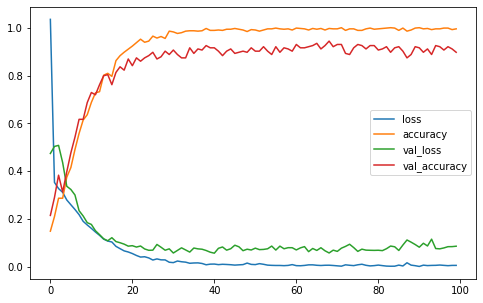

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()


Plot the acc and loss of model

Test model pre-train

In [ ]:
# load model
model_cnn = tf.keras.models.load_model(model_path)

In [ ]:
# test model
y_pred = model_cnn.predict(X_test)
count = 0
for i in range(len(X_test)):
    index = y_pred[i].tolist()
    pred = index.index(max(index))
    index = y_test[i].tolist()
    true = index.index(max(index))

    print(pred, "-------", true)
    if pred == true:
        count+=1

print(count, len(y_test))

#================================================================================================================================
print('========================')

# test data with the image capture from cam
path_test = '/content/drive/MyDrive/Colab Notebooks/data_face_recognition/data_test'
images = [os.path.join(path_test, f) for f in os.listdir(path_test)]
faces_test = []
fix_size = (size_img, size_img)

for image in images:

      face_img = Image.open(image).convert('L')  #.convert('L) to gray image, not need gray in under
      # # convert color to gray
      # gray_image = ImageOps.grayscale(face_img)

      # resize
      face_np = np.array(face_img, 'uint8')
      face_resize = cv2.resize(face_np, fix_size)

      # split to get ID of the image

      faces_test.append(face_resize)

faces_test = np.array(faces_test)
test_data = faces_test.reshape((-1,size_img,size_img,1))
predict = model_cnn.predict(test_data)
count = 0
for i in predict:
  mid = i.tolist()
  label = id_classes[mid.index(max(mid))]
  if label == 2:
    count += 1
  print(id_classes[mid.index(max(mid))])
print(count, len(predict))

8 ------- 9
5 ------- 5
0 ------- 0
3 ------- 3
1 ------- 1
6 ------- 6
0 ------- 0
1 ------- 1
5 ------- 5
6 ------- 2
8 ------- 8
1 ------- 1
1 ------- 1
0 ------- 0
4 ------- 4
4 ------- 4
1 ------- 1
8 ------- 8
0 ------- 0
4 ------- 4
0 ------- 0
0 ------- 0
1 ------- 1
5 ------- 5
1 ------- 1
7 ------- 7
5 ------- 5
0 ------- 0
8 ------- 8
8 ------- 8
0 ------- 0
9 ------- 9
1 ------- 1
1 ------- 1
6 ------- 6
1 ------- 1
1 ------- 1
8 ------- 5
9 ------- 9
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 0
1 ------- 1
8 ------- 8
6 ------- 6
5 ------- 5
9 ------- 9
8 ------- 8
2 ------- 2
2 ------- 2
0 ------- 0
1 ------- 1
4 ------- 4
51 54
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
29 51


This paper is good for dataset but real is not, using camera to recognition is bad
